In [74]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
stock = '^BSESN'
data = yf.download(stock,'2010-01-01','2023-05-19')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,17473.449219,17582.839844,17378.380859,17558.730469,17558.730469,28200
2010-01-05,17555.769531,17729.779297,17555.769531,17686.240234,17686.240234,27000
2010-01-06,17719.470703,17790.330078,17636.710938,17701.130859,17701.130859,21400
2010-01-07,17701.970703,17733.339844,17566.539062,17615.720703,17615.720703,18000
2010-01-08,17603.869141,17658.119141,17508.960938,17540.289062,17540.289062,17200


In [76]:
price = data['Close']
price

Date
2010-01-04    17558.730469
2010-01-05    17686.240234
2010-01-06    17701.130859
2010-01-07    17615.720703
2010-01-08    17540.289062
                  ...     
2023-05-12    62027.898438
2023-05-15    62345.710938
2023-05-16    61932.468750
2023-05-17    61560.640625
2023-05-18    61431.738281
Name: Close, Length: 3288, dtype: float64

<Axes: xlabel='Date'>

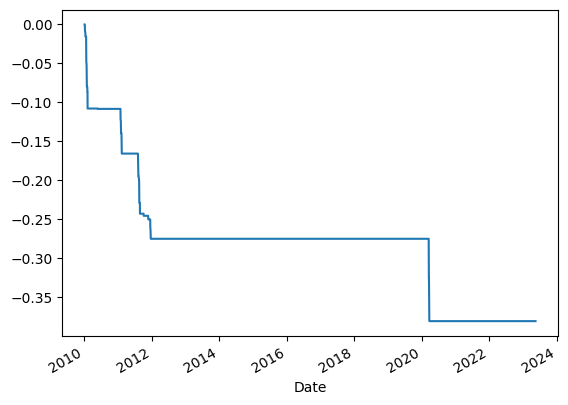

In [77]:
#Maximum Drawdown (MDD) calculation
roll_max = data['Close'].rolling(len(price)-1,min_periods=1).max()
daily_drawdown = data['Close']/roll_max - 1.0
mdd = daily_drawdown.rolling(len(price)-1,min_periods=1).min()
mdd.plot()

In [78]:
print(f"Maximum Drawdown for the given period is: {mdd[-1]*100} %")

Maximum Drawdown for the given period is: -38.07005445967564 %


In [79]:
#Cumulative returns
returns = data['Close'].resample('D').ffill().pct_change().to_numpy()
returns[0] = 0
returns

array([ 0.        ,  0.0072619 ,  0.00084193, ..., -0.00662824,
       -0.00600377, -0.00209391])

In [80]:
cumulative_ret =( 1+returns).cumprod()
cumulative_ret

array([1.        , 1.0072619 , 1.00810995, ..., 3.52716097, 3.50598471,
       3.4986435 ])

In [81]:
print(f"Cumulative return of stock is {cumulative_ret[-1]*100}%")

Cumulative return of stock is 349.8643503332017%


In [82]:
# Sharpe ratio
yearly_returns = data['Close'].resample('Y').ffill().pct_change()
yearly_returns

Date
2010-12-31         NaN
2011-12-31   -0.246436
2012-12-31    0.256992
2013-12-31    0.089772
2014-12-31    0.298939
2015-12-31   -0.050251
2016-12-31    0.019486
2017-12-31    0.279060
2018-12-31    0.059063
2019-12-31    0.143766
2020-12-31    0.157503
2021-12-31    0.219941
2022-12-31    0.044408
2023-12-31    0.009714
Freq: A-DEC, Name: Close, dtype: float64

In [83]:
monthly_returns = data['Close'].resample('M').ffill().pct_change()
monthly_returns

Date
2010-01-31         NaN
2010-02-28    0.004377
2010-03-31    0.066844
2010-04-30    0.001765
2010-05-31   -0.034973
                ...   
2023-01-31   -0.021217
2023-02-28   -0.009870
2023-03-31    0.000499
2023-04-30    0.035953
2023-05-31    0.005225
Freq: M, Name: Close, Length: 161, dtype: float64

In [84]:
avg_yearly_return = yearly_returns.mean()
print(f"Average yearly return is : {avg_yearly_return*100}%")

Average yearly return is : 9.86120344145202%


In [85]:
sharpe_ratio = (avg_yearly_return - 0.05)/(monthly_returns.std())
print(f"Sharpe ratio is : {sharpe_ratio*10}")

Sharpe ratio is : 10.05217689042891


In [86]:
# Sortino ratio
neg_monthly_returns = monthly_returns[monthly_returns < 0]
neg_monthly_returns

Date
2010-05-31   -0.034973
2010-10-31   -0.001833
2010-11-30   -0.025513
2011-01-31   -0.106359
2011-02-28   -0.027519
                ...   
2022-06-30   -0.045845
2022-09-30   -0.035443
2022-12-31   -0.035799
2023-01-31   -0.021217
2023-02-28   -0.009870
Name: Close, Length: 68, dtype: float64

In [87]:
std_neg = neg_monthly_returns.std()
sortino = ((avg_yearly_return - 0.05)*10.0)/std_neg
print(f"Sortino Ratio: {sortino}")

Sortino Ratio: 14.415644155002306
